In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset/Diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().values.any()

False

In [17]:
from sklearn.model_selection import train_test_split

x = df.drop('Outcome', axis=1)
y = df['Outcome']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=37)

In [18]:
print(np.around(len(x_train)/len(df)*100 , 2), '% data is in training set')
print(np.around(len(x_test)/len(df)*100 , 2), '% data is in testing set')

69.92 % data is in training set
30.08 % data is in testing set


In [19]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
525,3,87,60,18,0,21.8,0.444,21
712,10,129,62,36,0,41.2,0.441,38
146,9,57,80,37,0,32.8,0.096,41
223,7,142,60,33,190,28.8,0.687,61
573,2,98,60,17,120,34.7,0.198,22


In [20]:
from sklearn.impute import SimpleImputer

replacement = SimpleImputer(missing_values=0, strategy='median')

cols = x_train.columns
x_train = pd.DataFrame(replacement.fit_transform(x_train))
x_test = pd.DataFrame(replacement.fit_transform(x_test))

In [21]:
x_train.columns = cols
x_test.columns = cols

In [22]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,3.0,87.0,60.0,18.0,125.0,21.8,0.444,21.0
1,10.0,129.0,62.0,36.0,125.0,41.2,0.441,38.0
2,9.0,57.0,80.0,37.0,125.0,32.8,0.096,41.0
3,7.0,142.0,60.0,33.0,190.0,28.8,0.687,61.0
4,2.0,98.0,60.0,17.0,120.0,34.7,0.198,22.0


In [23]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [24]:
y_pred_train = model.predict(x_train)

In [25]:
from sklearn import metrics
print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_train, y_pred_train)*100, 2), '%')

Model Accuracy: 76.16 %


In [26]:
y_pred_test = model.predict(x_test)

print('Model Accuracy:',
      np.around(metrics.accuracy_score(y_test, y_pred_test)*100, 2), '%')

Model Accuracy: 72.73 %


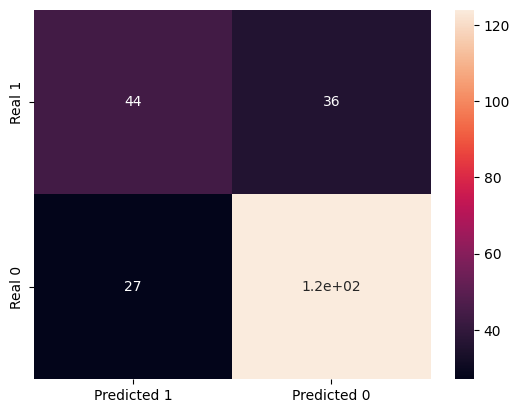

In [27]:
confusion = metrics.confusion_matrix(y_test,
                                     y_pred_test,
                                     labels=[1, 0])
confusion_df = pd.DataFrame(confusion,
                           index=['Real 1', 'Real 0'],
                           columns=['Predicted 1', 'Predicted 0']
                           )
sns.heatmap(confusion_df, annot=True)
plt.show()

In [29]:
evaluation = metrics.classification_report(y_test,
                                           y_pred_test,
                                           labels=[1, 0])

print(evaluation)

              precision    recall  f1-score   support

           1       0.62      0.55      0.58        80
           0       0.78      0.82      0.80       151

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.69       231
weighted avg       0.72      0.73      0.72       231

